In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load dataset
data = pd.read_csv('/Users/jaydugad/Desktop/Credit risk/credit_risk_dataset.csv')
print(data.columns)
print(data.head())

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MED

In [12]:
# Data Preprocessing
## Fill missing values
# Fill employment length with median
median_emp_length = data['person_emp_length'].median()
data['person_emp_length'].fillna(median_emp_length, inplace=True)

/var/folders/hk/05ks8vm51cdd09fypscdz4km0000gn/T/ipykernel_61740/1521764644.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(median_emp_length, inplace=True)


In [13]:
# Fill loan interest rate with median
median_int_rate = data['loan_int_rate'].median()
data['loan_int_rate'].fillna(median_int_rate, inplace=True)

/var/folders/hk/05ks8vm51cdd09fypscdz4km0000gn/T/ipykernel_61740/3104652878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['loan_int_rate'].fillna(median_int_rate, inplace=True)


In [14]:
## Encode categorical features
label_encoders = {}
for col in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [15]:
## Scale numerical features
scaler = StandardScaler()
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [16]:
# Split data into train and test sets
X = data.drop('loan_status', axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Model Training
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
# Model Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5072
           1       0.95      0.69      0.80      1445

    accuracy                           0.92      6517
   macro avg       0.93      0.84      0.88      6517
weighted avg       0.93      0.92      0.92      6517



In [20]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.9305531147326253


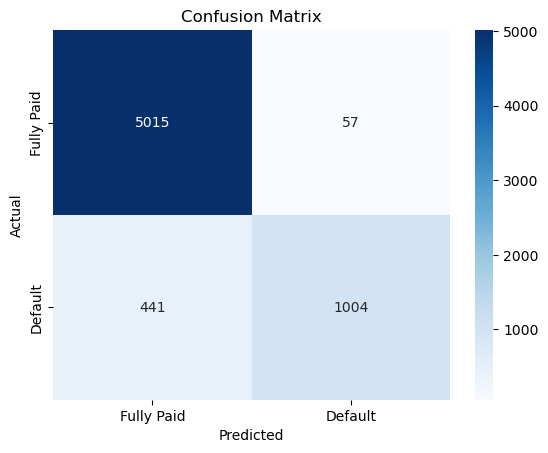

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fully Paid', 'Default'], yticklabels=['Fully Paid', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

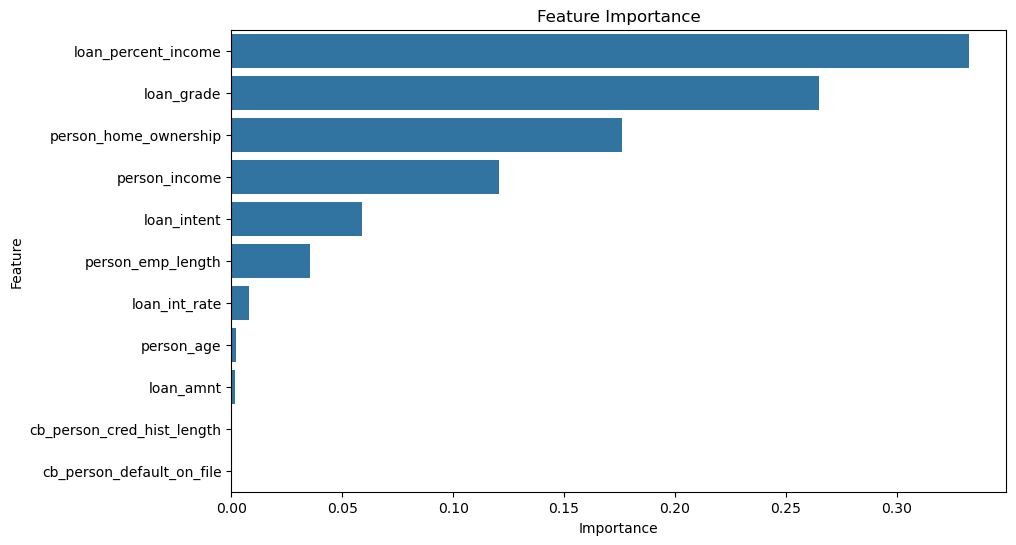

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [24]:
# Save Model and Scaler
import joblib
joblib.dump(model, 'credit_risk_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']